In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from scipy.stats import norm, skew
from scipy import stats
import numpy as np
import seaborn as sns

sns.set()
pd.set_option('max_columns', None)
#Data loading
train_set = pd.read_csv('./data/train.csv')
test_set = pd.read_csv('./data/test.csv')

combined_data = pd.concat((train_set, test_set), sort=False)

X = combined_data


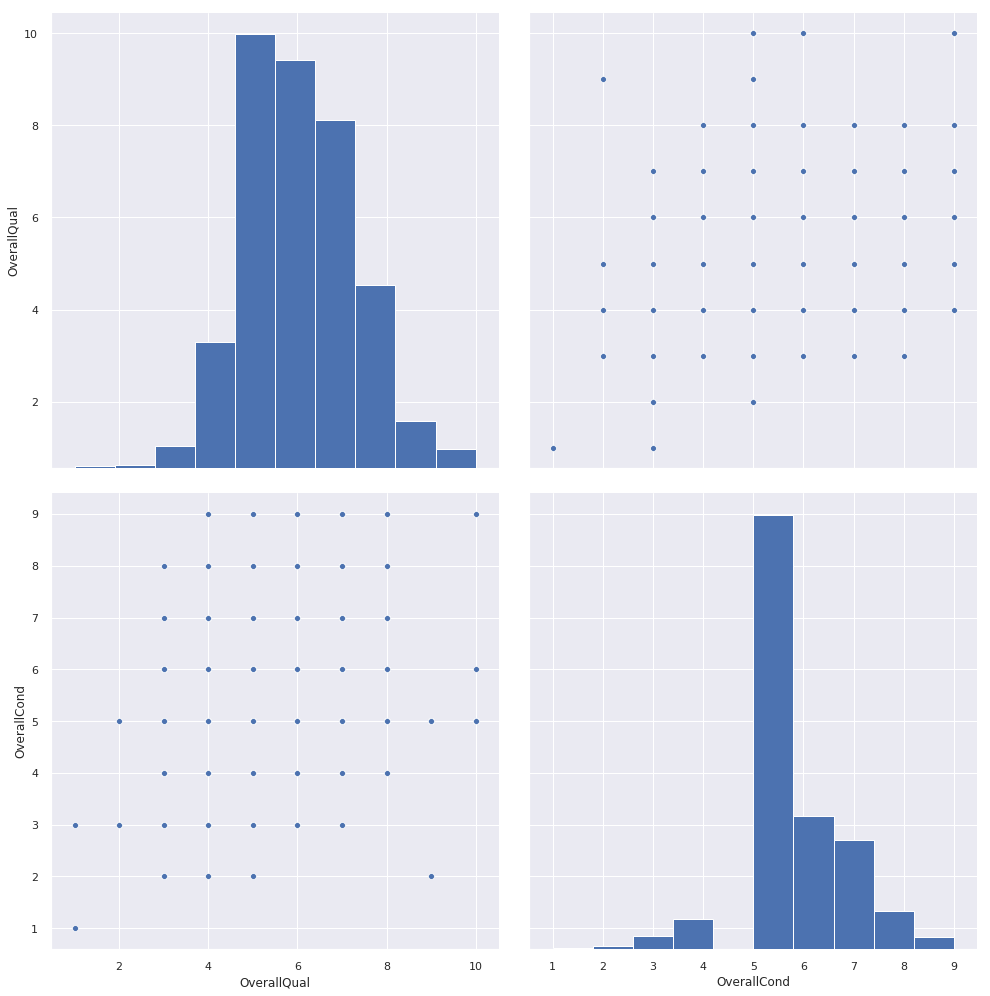

In [16]:
#OverallQual , OverallCond
cols = ['OverallQual', 'OverallCond']
sns.pairplot(train_set[cols], height=7)

#c

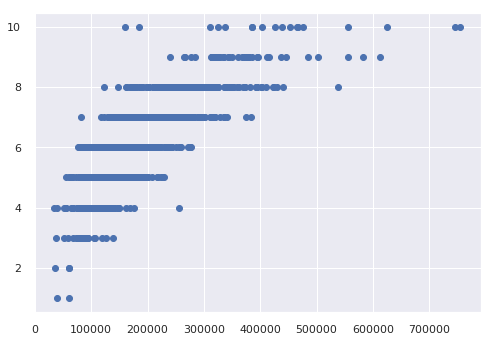

In [17]:
plt.scatter(train_set['SalePrice'],train_set['OverallQual'])

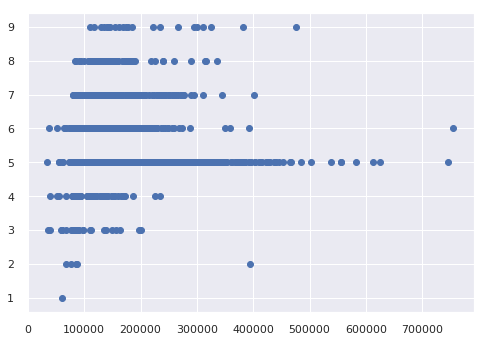

In [18]:
plt.scatter(train_set['SalePrice'],train_set['OverallCond'])

In [19]:
# drop OverallCond or combine it with SalePrice

In [20]:
#Total Living Space
X['TotalLivingSpace'] = (X['BsmtFinSF1'] + X['BsmtFinSF2'] + X['1stFlrSF'] + X['2ndFlrSF'])
#0.10951434699170796
#dropping 

In [23]:
# Kitchen is not in data. document is misleading.


In [ ]:
#Bathroom
X['Total_Bathrooms'] = (X['FullBath'] + (0.5*X['HalfBath']) +  X['BsmtFullBath'] + (0.5*X['BsmtHalfBath']))


In [28]:
#Basement
X[['TotalBsmtSF', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']]
#Drop 'BsmtFinSF1','BsmtFinSF2'
#Maybe...hasBasement, has 2ndfloor is enough. because it is already in TotalLivingSpace
#0.10919275455209296

,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
0,856.0,706.0,0.0,150.0
1,1262.0,978.0,0.0,284.0
2,920.0,486.0,0.0,434.0
3,756.0,216.0,0.0,540.0
4,1145.0,655.0,0.0,490.0
5,796.0,732.0,0.0,64.0
6,1686.0,1369.0,0.0,317.0
7,1107.0,859.0,32.0,216.0
8,952.0,0.0,0.0,952.0
9,991.0,851.0,0.0,140.0


In [30]:
X[['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath']]

,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath
0,2,1,1.0,0.0
1,2,0,0.0,1.0
2,2,1,1.0,0.0
3,1,0,1.0,0.0
4,2,1,1.0,0.0
5,1,1,1.0,0.0
6,2,0,1.0,0.0
7,2,1,1.0,0.0
8,2,0,0.0,0.0
9,1,0,1.0,0.0


In [32]:
X.loc[X['GarageYrBlt'] == 2207, 'GarageYrBlt'] = 2007



In [42]:
X[X['MiscVal'] >16000.000000]
#in the test_set. this seems outlier. drop the column?

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalLivingSpace
1089,2550,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,NaN,17000,10,2007,New,Partial,NaN,9105.0


In [48]:
X[X['SalePrice'].isnull()]
train_set.shape
test_set.shape

(1459, 80)

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([34900., 35311., 37900., ...,    nan,    nan,    nan])),
 (nan, nan, nan))

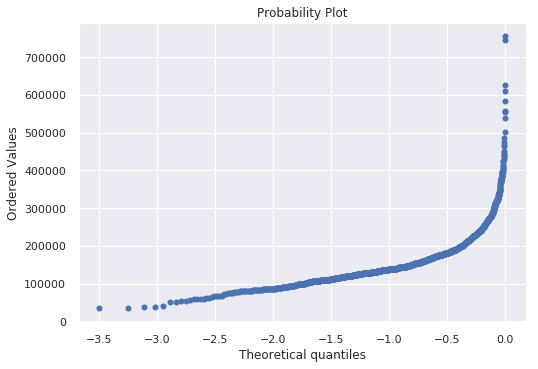

In [53]:
stats.probplot(X['SalePrice'], dist="norm", plot=plt)

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([  0,   0,   0, ..., 648, 738, 800])),
 (6.730426248454162, 2.2517985611510785, 0.18854665900394846))

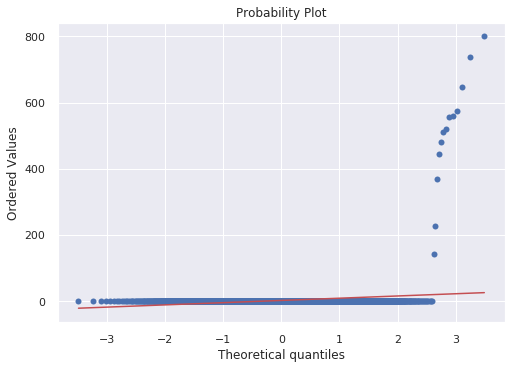

In [54]:
stats.probplot(X['PoolArea'], dist="norm", plot=plt)

((array([-3.49454834, -3.25034572, -3.11527604, ...,  3.11527604,
          3.25034572,  3.49454834]),
  array([ 334,  407,  438, ..., 4676, 5095, 5642])),
 (489.2852312886759, 1500.7598492634463, 0.9659918130329506))

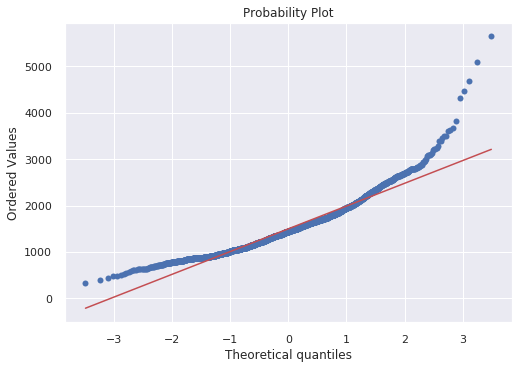

In [55]:

stats.probplot(X['GrLivArea'], dist="norm", plot=plt)

In [ ]:

#p1 = stats.probplot(X['GrLivArea'], dist="norm", plot=plt)
#p2 = stats.probplot(X['PoolArea'], dist="norm", plot=plt)
fig = plt.figure()
#ax1 = fig.add_subplot(121)
#ax2 = fig.add_subplot(122)
v=1

from pylab import *
subplots_adjust(hspace=0.000)
number_of_subplots=3
fig.tight_layout()
for i in X.dtypes[X.dtypes != "object"].index:
    ax1 = subplot(30,1,v)
    stats.probplot(X[i], dist="norm", plot= fig.add_subplot(ax1))
    v = v+1



In [ ]:
from scipy.special import boxcox1p

bc = boxcox1p(X[feat], 0.15)